In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):
    
    a:int
    b:int
    c:int

    equation: str
    discriminant: float
    result: str


In [32]:
def show_equation(state: QuadState) -> dict[str, str]:
    # Render ax^2 + bx + c with explicit signs for readability
    sign_b = "+" if state['b'] >= 0 else "-"
    sign_c = "+" if state['c'] >= 0 else "-"
    equation = f"{state['a']}x^2 {sign_b} {abs(state['b'])}x {sign_c} {abs(state['c'])}"
    return {'equation': equation}

In [33]:
def calculate_discriminant(state: QuadState):
    discriminant = state["b"]**2 - (4*state["a"]*state["c"])
    return {'discriminant': discriminant}

In [34]:
def real_roots(state: QuadState) -> str:
    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])
    result = f'The roots are {root1} and {root2}'
    return {'result': result}

In [35]:
def repeated_roots(state: QuadState) -> str:
    root = (-state["b"])/(2*state["a"])
    result = f'Only repeating root is {root}'
    return {'result': result}

In [36]:
def complex_roots(state: QuadState) -> str:
    real_part = (-state["b"])/(2*state["a"])
    imaginary_part = (abs(state["discriminant"])**0.5)/(2*state["a"])
    result = f'The roots are {real_part}+{imaginary_part}i and {real_part}-{imaginary_part}i'
    return {'result': result}

In [37]:
def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "complex_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "complex_roots"

In [38]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('complex_roots', complex_roots)


graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('complex_roots', END)


workflow = graph.compile()

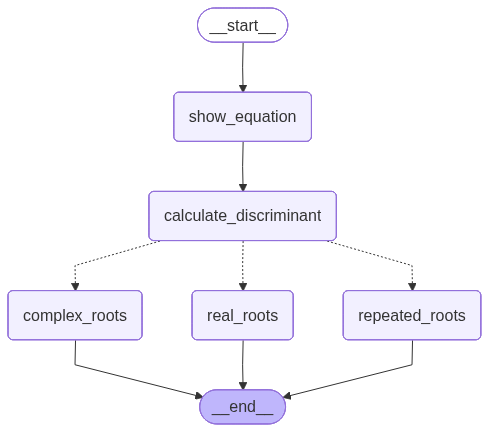

In [39]:
workflow

In [40]:
initial_state = {
    'a': 2,
    'b': 4,
    'c': 2
}

result = workflow.invoke(initial_state)

In [41]:
result

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x^2 + 4x + 2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}